In [43]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [44]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
df = pd.read_csv(url)
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [45]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [46]:
# get statistical info from dataset
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


# Preprocessing

In [47]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Employee_ID': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [48]:
# Drop Employee_ID because it's not useful for prediction
# Drop Job_Role because it's the same with Job_Level

df = df.drop(columns=['Employee_ID', 'Job_Role'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Level                      1000 non-null   int64 
 5   Monthly_Income                 1000 non-null   int64 
 6   Hourly_Rate                    1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Years_in_Current_Role          1000 non-null   int64 
 9   Years_Since_Last_Promotion     1000 non-null   int64 
 10  Work_Life_Balance              1000 non-null   int64 
 11  Job_Satisfaction               1000 non-null   int64 
 12  Performance_Rating             1000 non-null   int64 
 13  Trai

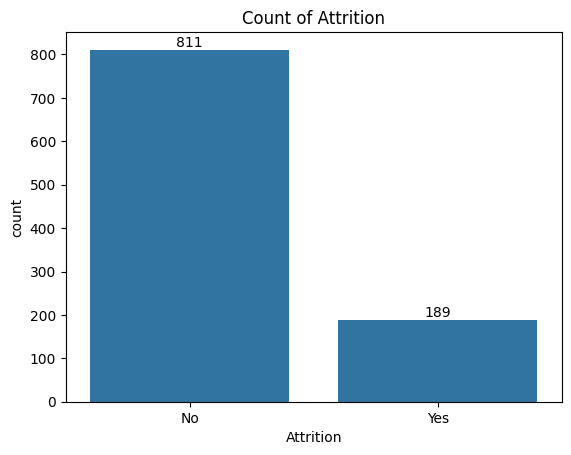

In [49]:
# show how many attrition
ax = sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset but it's okay let us try firsttt

# Feature Encoding

In [50]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import pprint

# 1. One-Hot Encoding
# Columns: Gender, OverTime
one_hot_map = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# 2. Nominal Encoding
# Columns: Department, Marital_Status
nominal_cols = ['Department', 'Marital_Status']

encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary to see category encodings
encode_dict = {}
for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the mapping dictionary for reference
pprint.pprint(encode_dict)

# Display sample of encoded dataframe
df_encoded.sample(n=5)


{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
287,24,0,0.0,4.0,3,10620,63,2,11,8,1,3,2,2,0,2,46,4,4,3,3,27,4,0
646,57,0,0.0,0.0,5,18960,77,18,1,1,4,4,2,84,1,6,54,13,1,3,3,34,3,0
18,49,0,0.0,1.0,1,14085,18,19,6,2,1,1,2,28,0,2,38,9,2,4,4,11,3,0
393,56,0,2.0,3.0,1,11876,84,5,9,0,4,2,2,67,0,3,35,1,4,4,4,16,2,1
662,59,0,1.0,4.0,1,18749,52,11,14,0,2,4,4,32,1,6,40,3,4,1,3,26,3,0


In [51]:
# checking encode result
df.loc[480]

,480
Age,31
Gender,Female
Marital_Status,Single
Department,Marketing
Job_Level,5
Monthly_Income,4191
Hourly_Rate,63
Years_at_Company,18
Years_in_Current_Role,3
Years_Since_Last_Promotion,0


# Separate features and target
Subtask:
Define the features (X) and the target variable (y)

**Reasoning**:
Define the features (X) by dropping the target variable 'Attrition' from the DataFrame and define the target variable (y) as the 'Attrition' column.

In [52]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [53]:
y.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


## Split data

### Subtask:
Split the encoded data into training and testing sets.

**Reasoning**:

Split the encoded feature DataFrame X and the target Series y into training and testing sets.



In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((700, 23), (300, 23))

In [56]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
105,41,0,1.0,3.0,2,6144,65,21,9,7,2,3,2,14,0,8,40,13,1,1,4,34,2
68,59,0,2.0,4.0,3,3935,24,7,7,2,2,2,1,39,0,7,55,12,3,2,4,19,2
479,56,0,1.0,4.0,1,15478,99,17,8,8,4,3,2,35,0,3,43,6,2,4,4,5,2
399,49,1,1.0,1.0,4,9040,35,29,10,7,1,4,1,16,1,9,51,17,4,3,4,45,1
434,52,0,2.0,3.0,1,11219,96,21,5,0,3,5,1,57,0,3,51,10,2,4,3,45,3


In [57]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
993,24,1,0.0,0.0,2,16465,32,10,10,2,4,2,4,6,1,7,51,18,2,2,3,8,4
859,25,0,0.0,1.0,5,18871,51,16,10,8,4,1,1,4,0,3,44,4,1,4,4,19,3
298,43,1,1.0,0.0,4,11226,81,26,1,2,2,4,4,34,1,6,47,7,2,3,2,32,1
553,58,0,0.0,4.0,3,18859,58,8,1,3,1,3,4,89,0,8,46,3,2,2,3,17,3
672,31,0,2.0,4.0,3,10509,19,23,1,4,3,1,3,79,0,7,48,7,4,1,4,36,1


# Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       134

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       245
           1       0.17      0.27      0.21        55

    accuracy                           0.63       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.69      0.63      0.66       300



# What to do next?
*   The F1 Score also significantly different so we need to handle this imbalance dataset. <br>
*   The accuracy of training set is 100% and testing set is 79%. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will tune the parameter by add a max_depth (limiting the depth/ branching of tree) and etc. <br>
*   And maybe we need to select and drop some features for the model.

# Oversampling using SMOTEC

In [59]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'Gender',
    'Marital_Status',
    'Department',
    'Overtime',
    'Job_Level',
    'Work_Life_Balance',
    'Job_Satisfaction',
    'Performance_Rating',
    'Work_Environment_Satisfaction',
    'Relationship_with_Manager',
    'Job_Involvement',
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 23), (487, 23))

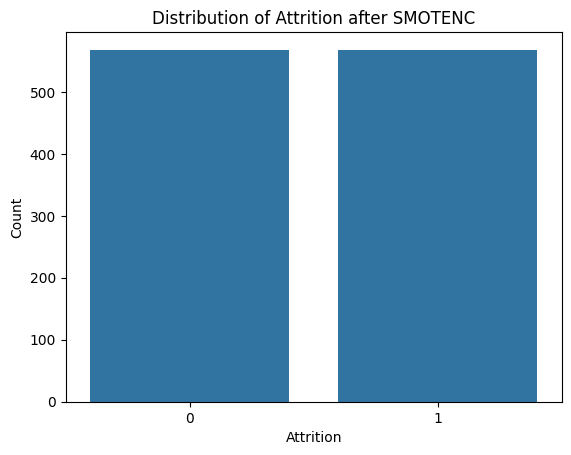

In [60]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Level                      1000 non-null   int64 
 5   Monthly_Income                 1000 non-null   int64 
 6   Hourly_Rate                    1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Years_in_Current_Role          1000 non-null   int64 
 9   Years_Since_Last_Promotion     1000 non-null   int64 
 10  Work_Life_Balance              1000 non-null   int64 
 11  Job_Satisfaction               1000 non-null   int64 
 12  Performance_Rating             1000 non-null   int64 
 13  Trai

In [62]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       244
           1       0.65      0.76      0.70       243

    accuracy                           0.68       487
   macro avg       0.68      0.68      0.68       487
weighted avg       0.68      0.68      0.68       487



# KFold Cross Validation

In [63]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1297, Test set:325
Fold:2, Train set: 1297, Test set:325
Fold:3, Train set: 1298, Test set:324
Fold:4, Train set: 1298, Test set:324
Fold:5, Train set: 1298, Test set:324


In [64]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.66875    0.72392638 0.69781931 0.68587896 0.75824176]
Average score: 0.71


In [65]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}
Best cross-validation f1 score: 0.711


# Feature Importance

In [66]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.04697297 0.         0.02463115 0.0105286  0.00836449 0.12986252
 0.0761813  0.06404741 0.05624927 0.08401717 0.01446696 0.03150324
 0.03491631 0.04796015 0.00501224 0.06621612 0.07412602 0.05094722
 0.02473891 0.01501123 0.02562003 0.05896969 0.04965698]


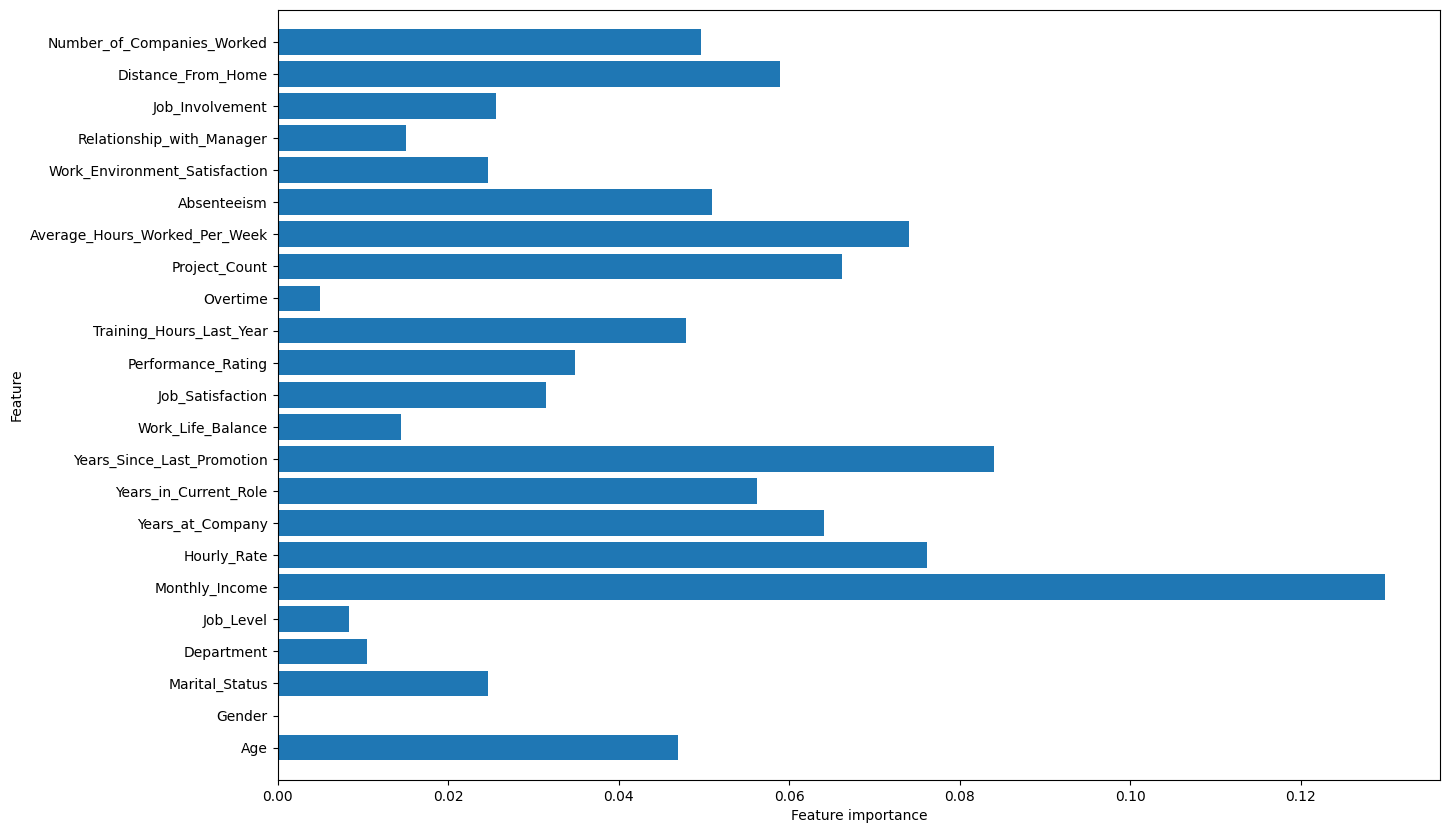

In [67]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [68]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
Monthly_Income,0.129863
Years_Since_Last_Promotion,0.084017
Hourly_Rate,0.076181
Average_Hours_Worked_Per_Week,0.074126
Project_Count,0.066216
Years_at_Company,0.064047
Distance_From_Home,0.058970
Years_in_Current_Role,0.056249
Absenteeism,0.050947


In [69]:
# Using only important features for the prediction
important_features = ["Monthly_Income", "Years_Since_Last_Promotion", "Years_at_Company", "Average_Hours_Worked_Per_Week", "Hourly_Rate"]

# Define X (input) and y (target)
X_importance = df_encoded[important_features]
y_importance = df_encoded['Attrition']


In [70]:
display(X_importance)
display(y_importance)

,Monthly_Income,Years_Since_Last_Promotion,Years_at_Company,Average_Hours_Worked_Per_Week,Hourly_Rate
0,15488,2,15,54,28
1,13079,1,6,45,28
2,13744,8,24,34,24
3,6809,2,10,48,26
4,10206,1,29,33,52
...,...,...,...,...,...
995,4172,3,24,46,76
996,11007,0,19,36,71
997,4641,3,25,46,43
998,19855,0,13,52,92


,Attrition
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


In [71]:
# oversampling againnn
categorical_features = ["Monthly_Income", "Years_Since_Last_Promotion"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 5), (487, 5))

In [72]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       579

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       255
           1       0.68      0.80      0.73       232

    accuracy                           0.72       487
   macro avg       0.73      0.73      0.72       487
weighted avg       0.73      0.72      0.72       487



# Selecting Predictors/Features Based on Correlation

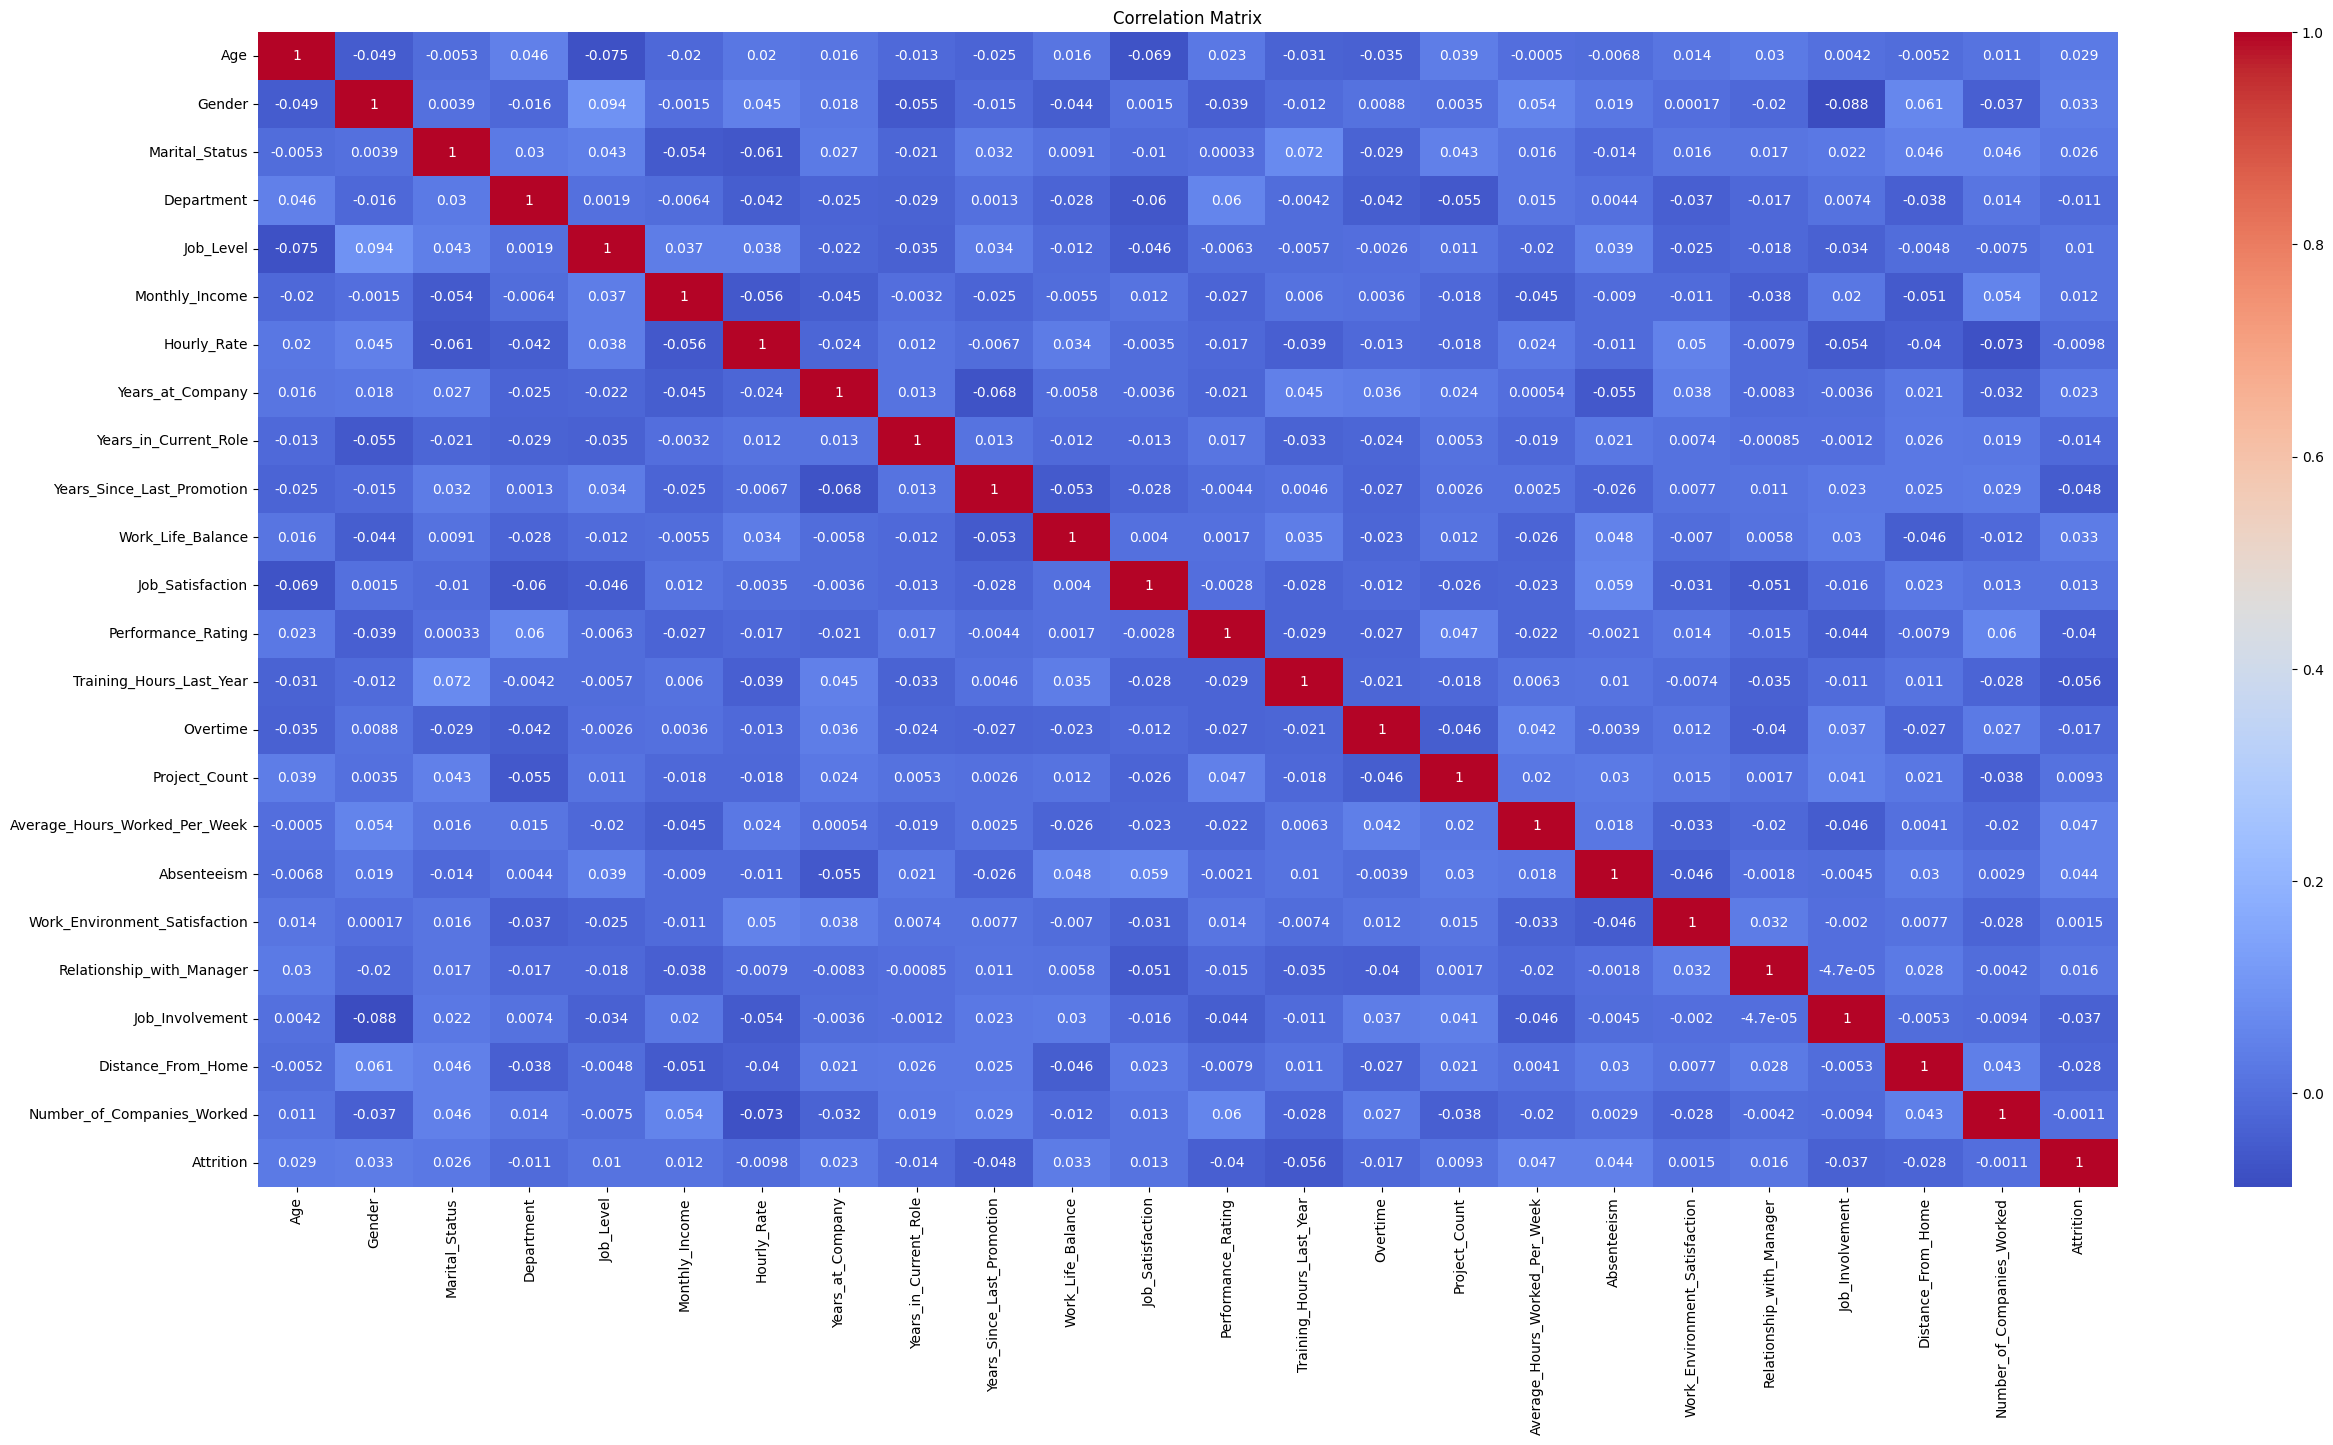

In [73]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [74]:
# I only selected a few features with the highest correlation to the target, and if there were two predictors that were highly correlated with each other
# I only kept the one with the stronger correlation — for example, between JobLevel and MonthlyIncome, I chose JobLevel.

heatmap_features = ['Department', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Distance_From_Home', 'Performance_Rating', 'Job_Involvement']
X_heatmap = df_encoded[heatmap_features]
y_heatmap = df_encoded['Attrition']

In [75]:
# Don’t forget to define the categorical features.
categorical_features = ["Department", "Performance_Rating"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=2)
X_heatmap, y_heatmap = smotenc.fit_resample(X_heatmap, y_heatmap)

X_train, X_test, y_train, y_test = train_test_split(X_heatmap, y_heatmap, test_size=0.2, random_state=4)

# check the shape of X_train dan X_test
X_train.shape, X_test.shape

((1297, 6), (325, 6))

In [76]:
# i build a model based on best feature by correlation
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       658
           1       1.00      1.00      1.00       639

    accuracy                           1.00      1297
   macro avg       1.00      1.00      1.00      1297
weighted avg       1.00      1.00      1.00      1297


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       153
           1       0.75      0.74      0.75       172

    accuracy                           0.74       325
   macro avg       0.73      0.73      0.73       325
weighted avg       0.74      0.74      0.74       325



# Hyperparameter Tuning using Grid Search

In [77]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                          n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 41}
Best cross-validation f1 score: 0.688


In [78]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       658
           1       0.88      0.92      0.90       639

    accuracy                           0.90      1297
   macro avg       0.90      0.90      0.90      1297
weighted avg       0.90      0.90      0.90      1297


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       153
           1       0.76      0.74      0.75       172

    accuracy                           0.74       325
   macro avg       0.73      0.74      0.73       325
weighted avg       0.74      0.74      0.74       325



1. Model Evaluation
The model was evaluated using accuracy, precision, recall, and F1-score on both training and test data. Before tuning, the model achieved a perfect score on the training set with 100% accuracy, precision, recall, and F1-score, but only 74% accuracy on the test set, with precision, recall, and F1-scores around 0.72-0.75. This indicates that the model overfitted the training data, performing very well on known samples but struggling with unseen ones. After tuning, the training accuracy decreased to 0.90, with precision, recall, and F1-scores also around 0.90, while the test performance remained similar at 0.74 across all metrics.

2. Best Model and Hyperparameters
The tuned model produced the best performance because it balanced high accuracy with improved generalization. By adjusting the hyperparameters, the model became less overfitted — training accuracy dropped slightly, but the gap between training and test results was reduced. This means the tuned model is more robust and less likely to fail when predicting new data.

3. Baseline vs Tuned Model Comparison
Comparing both models, the baseline had perfect training accuracy but overfitted heavily, leading to a noticeable performance drop on the test set. The tuned model, while showing slightly lower training metrics, achieved a much better balance between training and testing performance. In conclusion, tuning successfully reduced overfitting, producing a more generalizable and stable model even though the overall test accuracy did not significantly improve.